In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.DataFrame(pd.read_csv('../data/indian_food.csv'))
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


Text(0, 0.5, '')

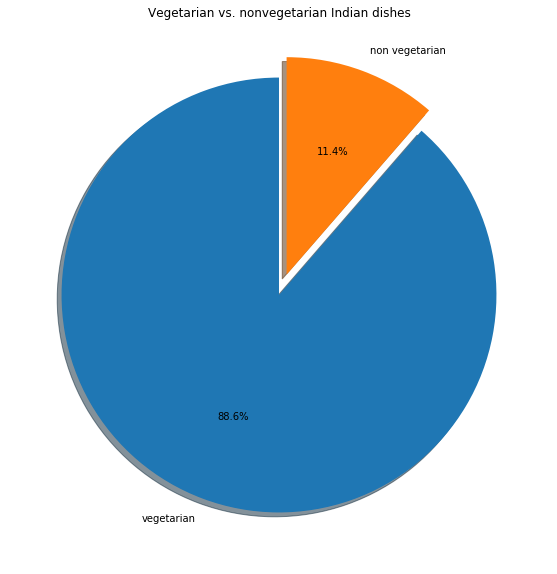

In [15]:
explode = (0, 0.1)
df.groupby('diet').size().sort_values(ascending=False)\
    .plot(kind='pie',\
          title='Vegetarian vs. nonvegetarian Indian dishes',\
          explode=explode,\
          figsize=(10,10),\
          autopct='%1.1f%%',\
          shadow=True,\
          startangle=90)\
    .set_ylabel('')

In [16]:
df.groupby('course')['cook_time'].mean().sort_values(ascending=False)

course
dessert        43.929412
starter        37.500000
main course    29.930233
snack          29.102564
Name: cook_time, dtype: float64

In [17]:
df.loc[df.cook_time==df.cook_time.min()].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


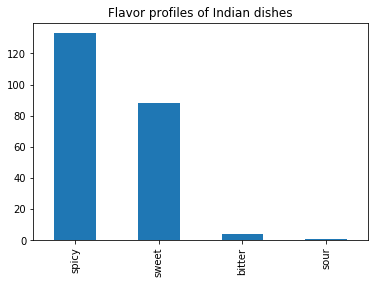

In [18]:
df.loc[df['flavor_profile'] != '-1']['flavor_profile'].value_counts()\
    .plot(kind='bar', title='Flavor profiles of Indian dishes')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0, 0.5, 'Cook time (mins)')

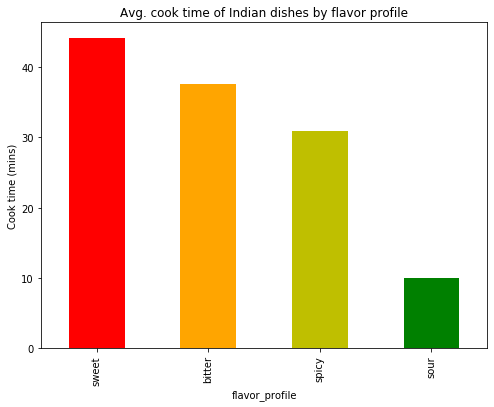

In [19]:
colors = ['r','orange','y','g','b']
df.loc[(df.cook_time != '-1') & (df.flavor_profile != '-1')]\
    .groupby('flavor_profile')['cook_time']\
    .mean().sort_values(ascending=False)\
    .plot(kind='bar', title='Avg. cook time of Indian dishes by flavor profile', figsize=(8,6), color=colors)\
    .set_ylabel("Cook time (mins)")

Text(0, 0.5, 'Prep time (mins)')

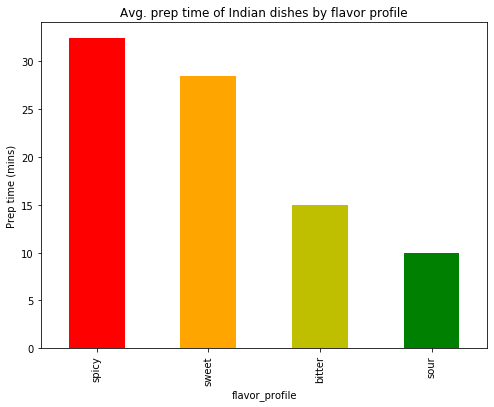

In [20]:
colors = ['r','orange','y','g','b']
df.loc[(df.prep_time != '-1') & (df.flavor_profile != '-1')]\
    .groupby('flavor_profile')['prep_time']\
    .mean().sort_values(ascending=False)\
    .plot(kind='bar', title='Avg. prep time of Indian dishes by flavor profile', figsize=(8,6), color=colors)\
    .set_ylabel("Prep time (mins)")

Text(0, 0.5, 'Time (mins)')

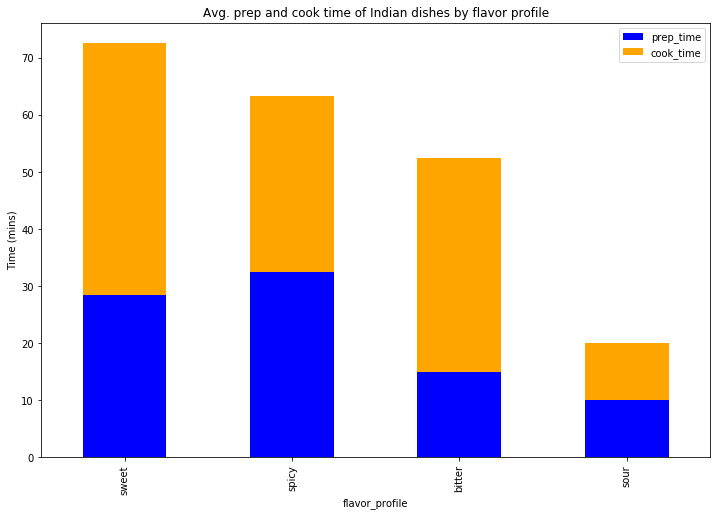

In [21]:
df['total_time'] = df['prep_time'] + df['cook_time']
colors = ['b','orange','r','g','y']
df.loc[(df.prep_time != '-1') & (df.flavor_profile != '-1')]\
    .groupby('flavor_profile')[['prep_time', 'cook_time', 'total_time']].mean()\
    .sort_values('total_time', ascending=False)\
    .drop(columns='total_time')\
    .plot(kind='bar',\
          title='Avg. prep and cook time of Indian dishes by flavor profile',\
          figsize=(12,8),\
          color=colors,\
          stacked=True)\
    .set_ylabel("Time (mins)")

Text(0, 0.5, 'Time (mins)')

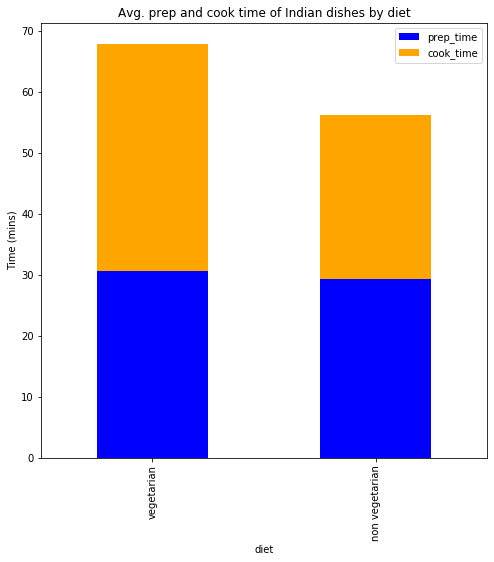

In [22]:
# df['total_time'] = df['prep_time'] + df['cook_time']
colors = ['b','orange','r','g','y']
df.loc[(df.prep_time != '-1') & (df.flavor_profile != '-1')]\
    .groupby('diet')[['prep_time', 'cook_time', 'total_time']].mean()\
    .sort_values('total_time', ascending=False)\
    .drop(columns='total_time')\
    .plot(kind='bar',\
          title='Avg. prep and cook time of Indian dishes by diet',\
          figsize=(8,8),\
          color=colors,\
          stacked=True)\
    .set_ylabel("Time (mins)")

Text(0, 0.5, 'Cook time (mins)')

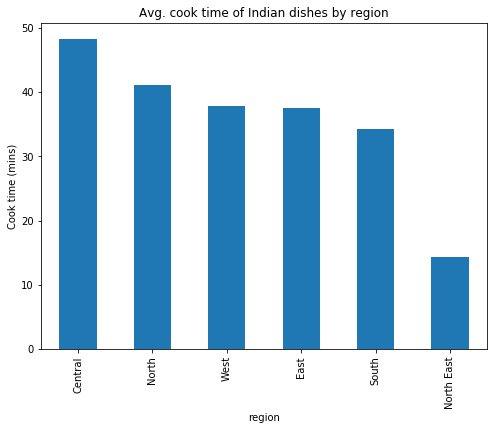

In [23]:
# colors = ['r','orange','y','g','b']
df.loc[(df.cook_time != '-1') & (df.region != '-1')]\
    .groupby('region')['cook_time']\
    .mean().sort_values(ascending=False)\
    .plot(kind='bar', title='Avg. cook time of Indian dishes by region', figsize=(8,6))\
    .set_ylabel("Cook time (mins)")

Text(0, 0.5, 'Cook time (mins)')

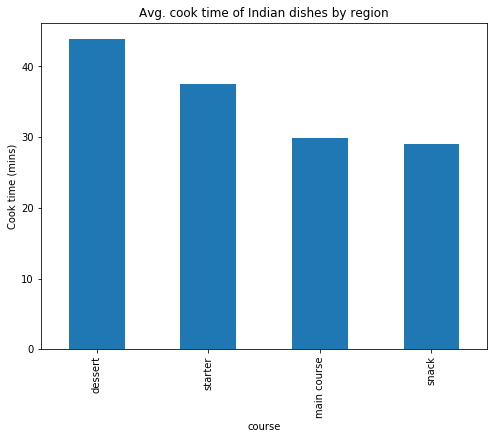

In [24]:
df.loc[(df.cook_time != '-1') & (df.course != '-1')]\
    .groupby('course')['cook_time']\
    .mean().sort_values(ascending=False)\
    .plot(kind='bar', title='Avg. cook time of Indian dishes by region', figsize=(8,6))\
    .set_ylabel("Cook time (mins)")